In [187]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [188]:
#Loading dataset

df = pd.read_csv("traffic.csv")
df.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


Quick Data Check

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [185]:
df.describe()

,Junction,Vehicles,ID
count,48120.000000,48120.000000,4.812000e+04
mean,2.180549,22.791334,2.016330e+10
std,0.966955,20.750063,5.944854e+06
min,1.000000,1.000000,2.015110e+10
25%,1.000000,9.000000,2.016042e+10
50%,2.000000,15.000000,2.016093e+10
75%,3.000000,29.000000,2.017023e+10
max,4.000000,180.000000,2.017063e+10


In [186]:
df.isna().sum()

DateTime    0
Junction    0
Vehicles    0
ID          0
dtype: int64

C:\Users\belug\Downloads\Traffic Prediction\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\belug\Downloads\Traffic Prediction\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\belug\Downloads\Traffic Prediction\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\belug\Downloads\Traffic Prediction\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be remov

Text(0.5, 0, 'Date')

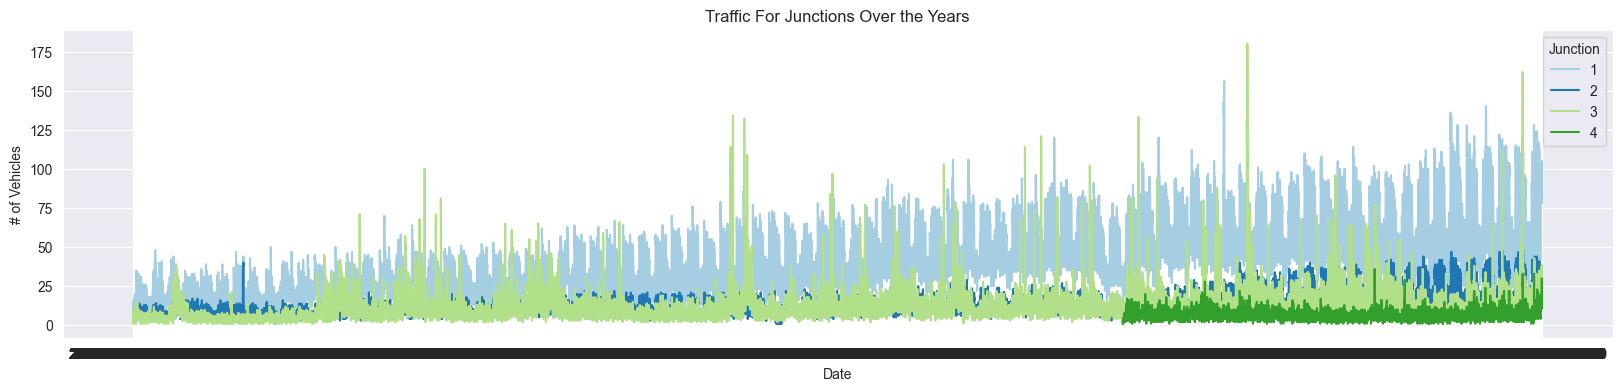

In [11]:
plt.figure(figsize=(20,4),facecolor="#627D78")
Time_series=sns.lineplot(x=df['DateTime'],y="Vehicles",data=df1, hue="Junction", palette=colors)
Time_series.set_title("Traffic On Junctions Over Years")
Time_series.set_ylabel("Number of Vehicles")
Time_series.set_xlabel("Date")

It is important to note that junction 4 has less data than other junctions. 

## Feature Engineering

In [164]:
df['Year'] = pd.DatetimeIndex(df["DateTime"]).year
df['Month'] = pd.DatetimeIndex(df["DateTime"]).month
df['Day'] = pd.DatetimeIndex(df["DateTime"]).day
df['Hour'] = pd.DatetimeIndex(df["DateTime"]).hour



In [165]:
df['DateTime'] = pd.to_datetime(df['DateTime'])
df['Day_of_Week'] = df['DateTime'].dt.day_name()

In [166]:
df = df.drop("ID", axis=1)

## Exporatory Data Analysis

In [ ]:
plt.figure(figsize=(15,4))
sns.barplot(data=df, y='Vehicles', x='Junction')

We can see that on average, Junction 1 has a lot more vehicles passing through it. 

C:\Users\belug\Downloads\Traffic Prediction\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\belug\Downloads\Traffic Prediction\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\belug\Downloads\Traffic Prediction\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\belug\Downloads\Traffic Prediction\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be remov

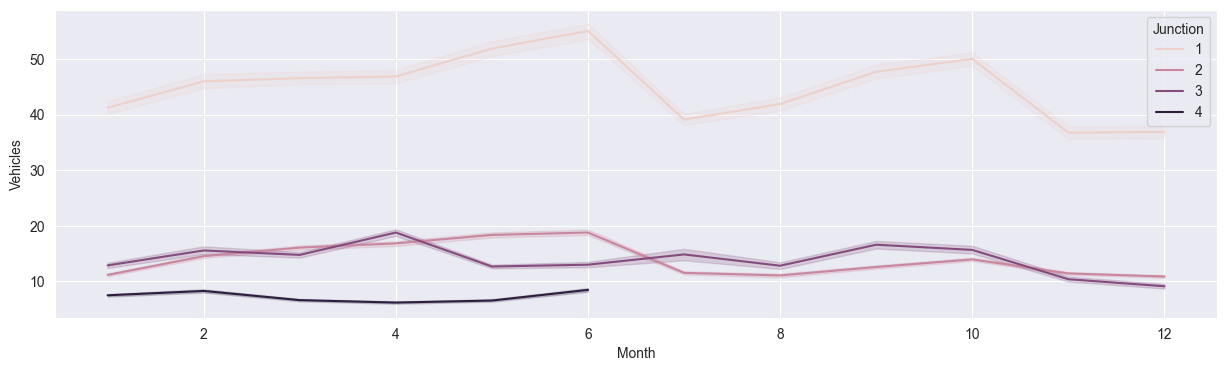

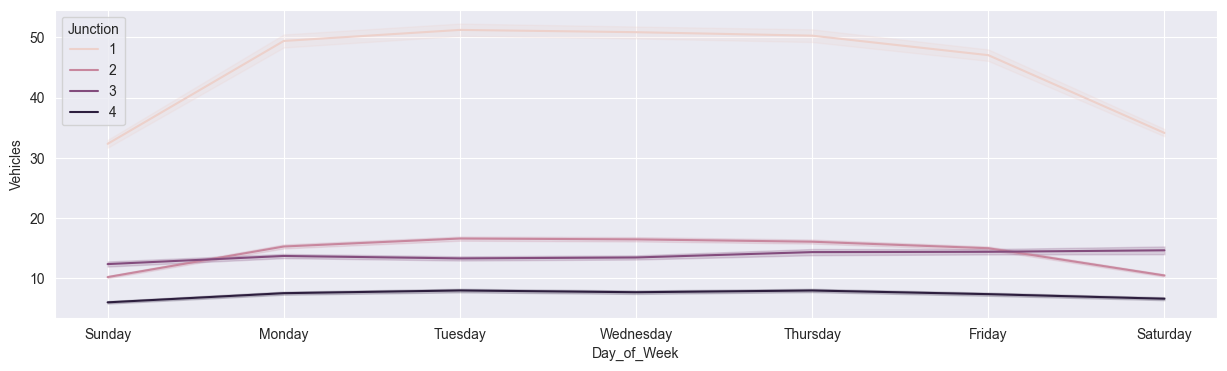

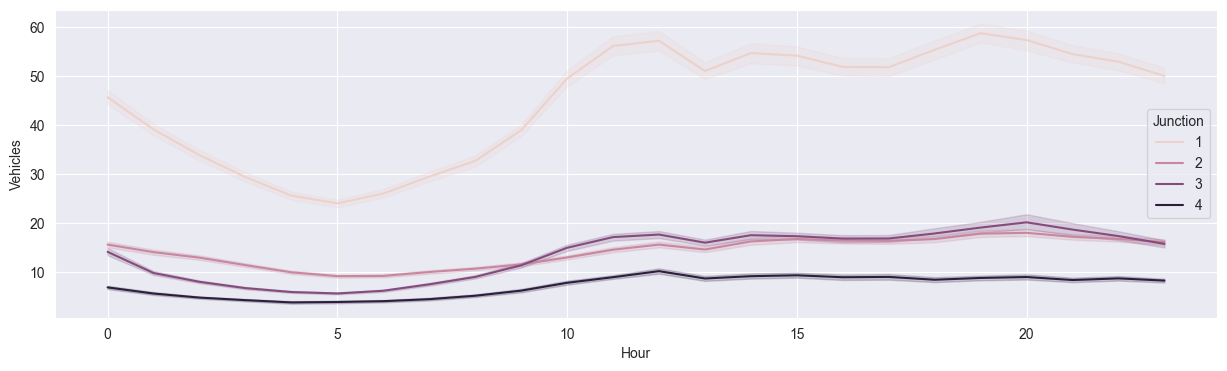

In [47]:
features = ['Month', 'Day_of_Week', 'Hour']

for x in features:
    plt.figure(figsize=(15,4))    
    sns.lineplot(x=df[x], y='Vehicles', data=df, hue='Junction')


- Throughout the months we can see a steady increase in vehicles for all junctions with a dip in vehicles throughout November and December. Additionally, junction 4 has less data and doesn't span throughout the whole year as stated above. 
- Throught the days of the week, we can see that Monday to Friday is the busiest with the weekends being less busy.
- As the hours progress throughout the day, we can see that in the morning, there is a jump in vehicles passing through all junctions primarly because of rush hour traffic. We can see after 8PM, that the vehicles passing through a junction declines as most people are at home and not commuting. 

C:\Users\belug\Downloads\Traffic Prediction\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\belug\Downloads\Traffic Prediction\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\belug\Downloads\Traffic Prediction\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\belug\Downloads\Traffic Prediction\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be remov

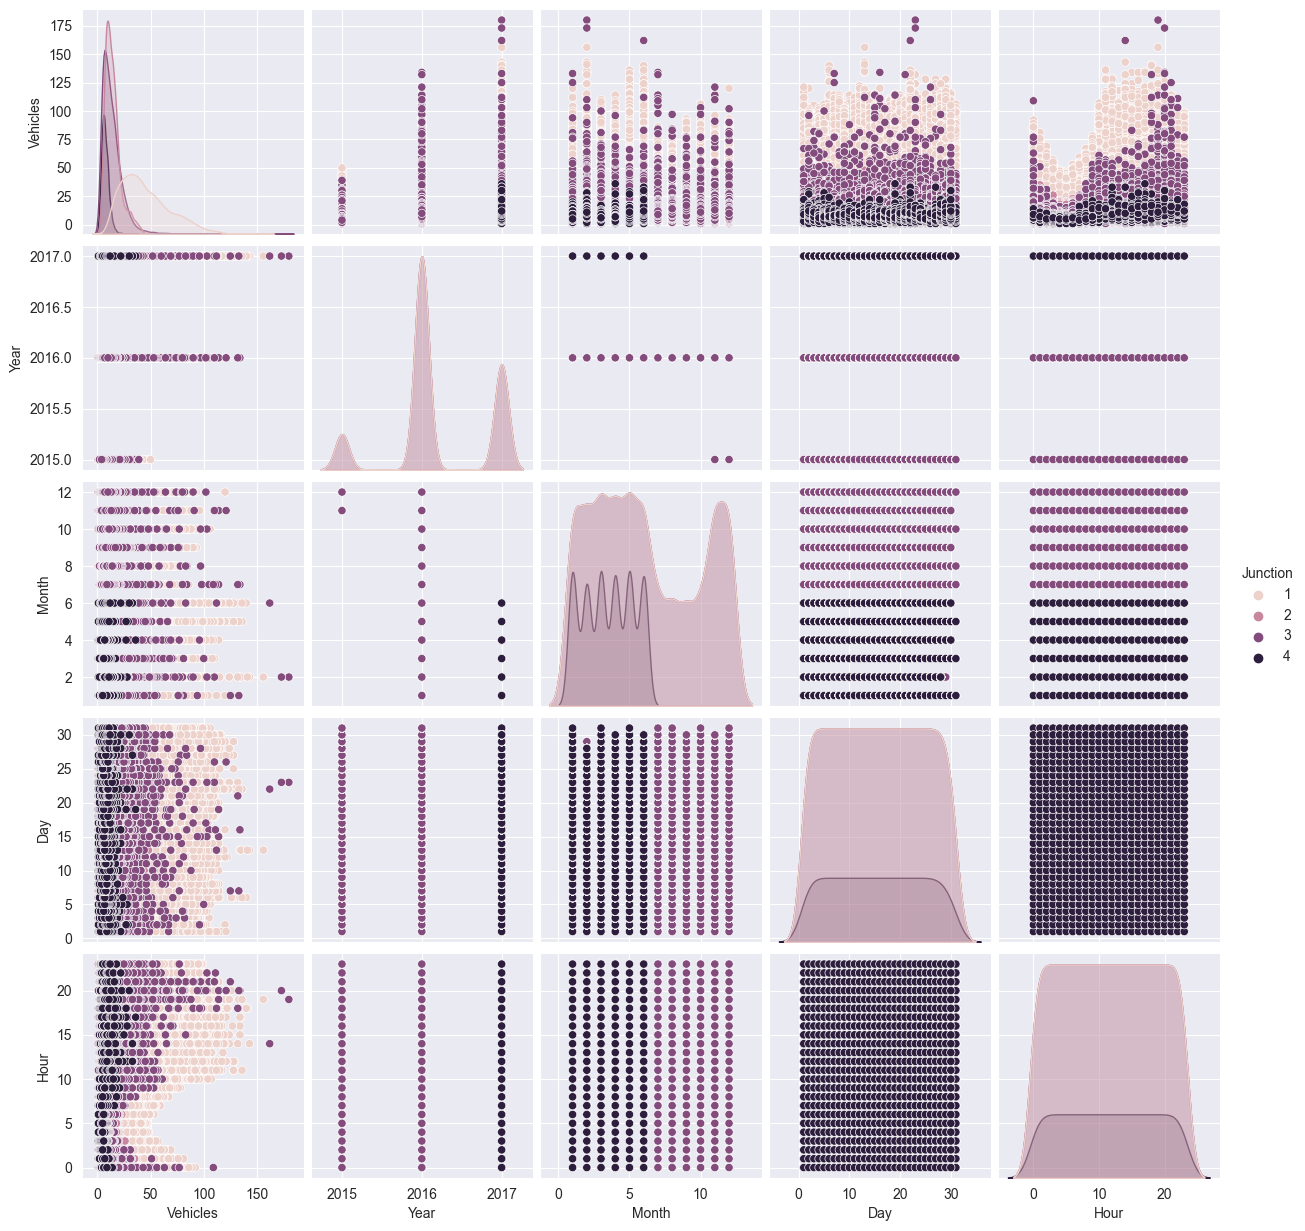

In [52]:
sns.pairplot(data=df, hue='Junction')

## Conclusions:
- Since Junction 1 has a lot more data than the rest of the junctions, the dataset should be normalized to transform features to be on the same scale
- With spare data from Junction 4, it should probably be removed. 
- The number of vehicles are correlated to the day of the week and rush hour traffic as people are commuting to and from their work place. 

# Data Preprocessing

In [167]:
#Mapping Dictionary
day_to_number = {
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 7
}

df['Day_of_Week'] = df['Day_of_Week'].map(day_to_number)

In [168]:
df.head()

,DateTime,Junction,Vehicles,Year,Month,Day,Hour,Day_of_Week
0,2015-11-01 00:00:00,1,15,2015,11,1,0,7
1,2015-11-01 01:00:00,1,13,2015,11,1,1,7
2,2015-11-01 02:00:00,1,10,2015,11,1,2,7
3,2015-11-01 03:00:00,1,7,2015,11,1,3,7
4,2015-11-01 04:00:00,1,9,2015,11,1,4,7


In [169]:
df_1 = df[df['Junction'] == 1]

X = df_1.drop(['Vehicles', 'DateTime'],axis=1)
y = df_1['Vehicles']


In [170]:
X

,Junction,Year,Month,Day,Hour,Day_of_Week
0,1,2015,11,1,0,7
1,1,2015,11,1,1,7
2,1,2015,11,1,2,7
3,1,2015,11,1,3,7
4,1,2015,11,1,4,7
...,...,...,...,...,...,...
14587,1,2017,6,30,19,5
14588,1,2017,6,30,20,5
14589,1,2017,6,30,21,5
14590,1,2017,6,30,22,5


## Model Building/Fitting

In [181]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


In [182]:

def run_model(model,X_train,y_train,X_test,y_test):
    
    # Fit Model
    model.fit(X_train,y_train)
    

    
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test,preds))
    
    preds = pd.DataFrame(preds, columns = ['Vehicles'])
    y_test.to_frame()
    y_test = y_test.reset_index()
    y_test = y_test.drop(['index'], axis=1)
    
    
    
    r2 = r2_score(y_test, preds)
    print(f'RMSE : {rmse}')
    print(f'R^2 : {r2}')
    
    
 
    
    
    
    plt.figure(figsize=(30,8))
    plt.plot(y_test,label="True Value")
    plt.plot(preds,label="Predicted Values")
    plt.title("Random Forest Regressor Vs True Values")
    plt.xlabel("DateTime")
    plt.ylabel("Number of Vehicles")
    plt.legend()
    plt.show()

In [173]:
from sklearn.model_selection import train_test_split

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [175]:
from sklearn.ensemble import RandomForestRegressor

In [103]:
X_test

,Junction,Year,Month,Day,Hour,Day_of_Week
3301,1,2016,3,17,13,4
13514,1,2017,5,17,2,3
5322,1,2016,6,9,18,4
11485,1,2017,2,21,13,2
150,1,2015,11,7,6,6
...,...,...,...,...,...,...
12102,1,2017,3,19,6,7
14011,1,2017,6,6,19,2
6554,1,2016,7,31,2,7
11963,1,2017,3,13,11,1


RMSE : 4.081031040586545
R^2 : 0.9684652866027372


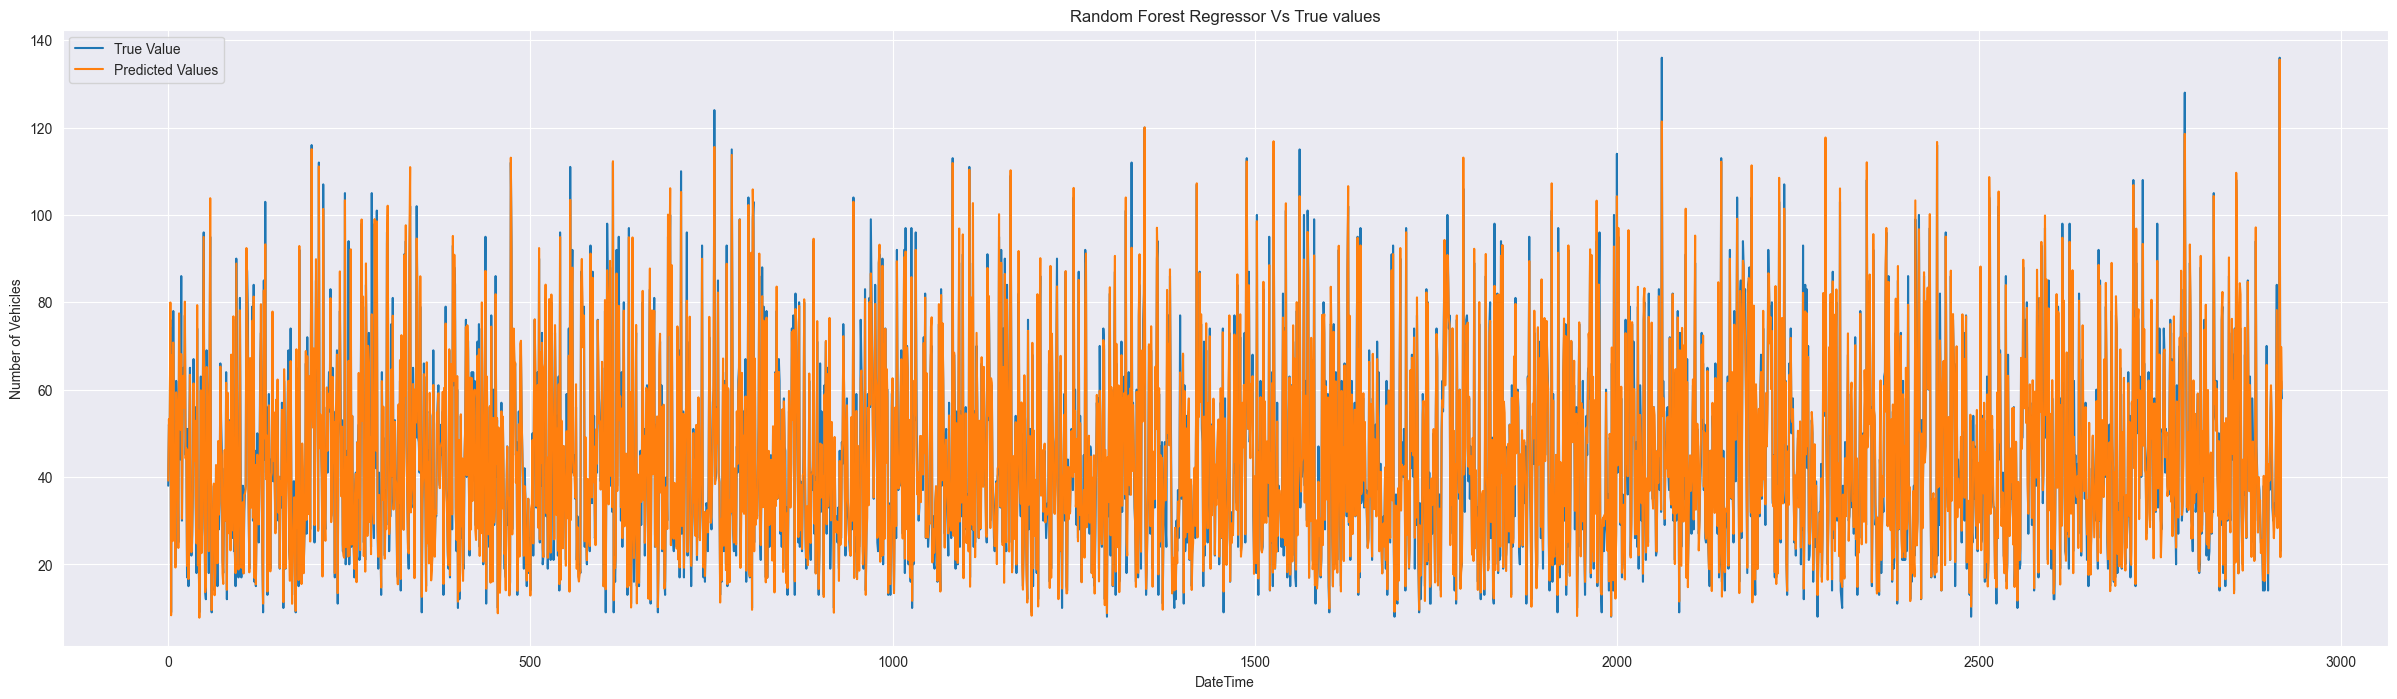

In [180]:
model = RandomForestRegressor(n_estimators=100)
run_model(model,X_train,y_train,X_test,y_test)
    
    

## Results:
Overall, using Random Forest Regressor to predict the Number of Vehicles worked well. The Root Mean Squared Error (RMSE) tells you that the average difference between the values predicted vs the actual values is 4. Additionally, the R^2 value tells us that my model fit really well to the data provided. 
